# car price prediction (linear regression)

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("carPrice.csv")

In [3]:
df.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
carCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Pre-processing

In [5]:
#drop car_ID because it is similar to index number....
df=df.drop("car_ID",axis=1)

In [6]:
#get the dummy variables on catogorical columns
dc=pd.get_dummies(df[["carCompany","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]],drop_first=True)

In [7]:
#drop original columns
df=df.drop(["carCompany","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"],axis=1)

In [8]:
# again check the info

In [9]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 50 columns):
carCompany_audi             205 non-null uint8
carCompany_bmw              205 non-null uint8
carCompany_chevrolet        205 non-null uint8
carCompany_dodge            205 non-null uint8
carCompany_honda            205 non-null uint8
carCompany_isuzu            205 non-null uint8
carCompany_jaguar           205 non-null uint8
carCompany_mazda            205 non-null uint8
carCompany_mercedes-benz    205 non-null uint8
carCompany_mercury          205 non-null uint8
carCompany_mitsubishi       205 non-null uint8
carCompany_nissan           205 non-null uint8
carCompany_peugot           205 non-null uint8
carCompany_plymouth         205 non-null uint8
carCompany_porsche          205 non-null uint8
carCompany_renault          205 non-null uint8
carCompany_saab             205 non-null uint8
carCompany_subaru           205 non-null uint8
carCompany_toyota           205 non-null uint8
ca

In [10]:
#concatinate both the data frames df,dc
df=pd.concat([df,dc],axis=1)

In [11]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


# Train Test Split

In [12]:
X=df.drop("price",axis=1)
y=df["price"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## model selection

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
clf = LinearRegression()

clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions & r2_score

In [17]:
pred=clf.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9027084777598556


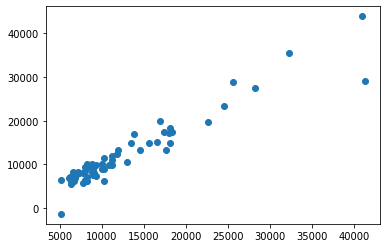

In [19]:
plt.scatter(y_test,pred)

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1603.5924422081523
MSE: 5873549.507529656
RMSE: 2423.5406964871986


In [21]:
#check error distribution

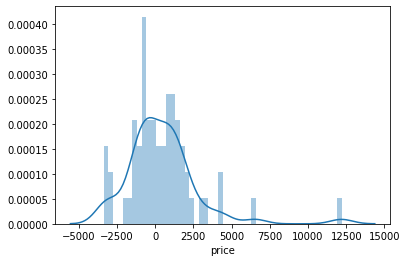

In [22]:
sns.distplot((y_test-pred),bins=50);

In [23]:
## Interpret the co-effs

In [24]:
coeffecients = pd.DataFrame(clf.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
symboling,136.836603
wheelbase,322.987462
carlength,-193.986141
carwidth,861.577961
carheight,-134.194310
...,...
fuelsystem_idi,8523.014497
fuelsystem_mfi,0.000000
fuelsystem_mpfi,2847.098871
fuelsystem_spdi,2259.413936
